I will be using house sales data from King County, USA (including Seattle) from 2014-2015 along with Python, sci-kit learn, pandas, and numpy to perform linear regression and predict housing prices while highlighting the most strongly correlated features that predict the target value of price.
This analysis will begin with EDA and cleaning of the data.

In [1]:
import matplotlib.pyplot as plt          #importing some packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

kc_housing = pd.read_csv('Datasets/kc_house_data.csv', index_col=0)     #read in the csv
print(kc_housing.head()) #We'll get a preliminary look at the data

                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        10

To be honest I do not know how the sqft_living15 and sqft_lot15 columns differ from the sqft_living and sqft_lot columns. Did the lot and living spaces change in 1 year's time after a sale? Let's take a deeper look at the data and see if we can find any missing values.

In [2]:
print(kc_housing.tail(n = 17))
print(kc_housing.shape)
kc_housing.describe()

                       date      price  bedrooms  bathrooms  sqft_living  \
id                                                                         
7502800100  20140813T000000   679950.0         5       2.75         3600   
191100405   20150421T000000  1575000.0         4       3.25         3410   
8956200760  20141013T000000   541800.0         4       2.50         3118   
7202300110  20140915T000000   810000.0         4       3.00         3990   
249000205   20141015T000000  1537000.0         5       3.75         4470   
5100403806  20150407T000000   467000.0         3       2.50         1425   
844000965   20140626T000000   224000.0         3       1.75         1500   
7852140040  20140825T000000   507250.0         3       2.50         2270   
9834201367  20150126T000000   429000.0         3       2.00         1490   
3448900210  20141014T000000   610685.0         4       2.50         2520   
7936000429  20150326T000000  1007500.0         4       3.50         3510   
2997800021  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


It seems we have some 0-value entries in the bedrooms and bathrooms columns. Let's look deeper into this to see how to deal with these rows (delete the whole row or replace the 0 entry).

In [4]:
sort_by_bedrooms = kc_housing.sort_values('bedrooms')
print(sort_by_bedrooms.head()) #There are valid rows with all other columns correctly populated with 0 entries for
#both the 'bedrooms' and 'bathrooms' columns. 
print(kc_housing[kc_housing['bedrooms'] == 0].shape) #This shows there are only 13 rows with the 'bedrooms' column at 0; in a dataset
#containing over 21,000 total rows, we are safe deleting these rows.

#Now 'bathrooms' column
sort_by_bathrooms = kc_housing.sort_values('bathrooms')
print(sort_by_bathrooms.head()) 
print(kc_housing[kc_housing['bedrooms'] == 0.0].shape)#Again there are 13 rows with the 'bathrooms' column at 0; in a dataset
#containing over 21,000 total rows, we are also safe deleting these rows.

print(kc_housing.shape) #Shape before row deletion
kc_housing = kc_housing[kc_housing.bedrooms != 0]
kc_housing = kc_housing[kc_housing.bathrooms != 0.0]
print(kc_housing.shape) #Shape after row deletion

                       date      price  bedrooms  bathrooms  sqft_living  \
id                                                                         
3374500520  20150429T000000   355000.0         0        0.0         2460   
2954400190  20140624T000000  1295650.0         0        0.0         4810   
7849202190  20141223T000000   235000.0         0        0.0         1470   
3980300371  20140926T000000   142000.0         0        0.0          290   
9543000205  20150413T000000   139950.0         0        0.0          844   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
3374500520      8049     2.0           0     0          3      8        2460   
2954400190     28008     2.0           0     0          3     12        4810   
7849202190      4800     2.0           0     0          3      7        1470   
3980300371     20875     1.0           0     0          1      1   

From the two shapes printed, 16 rows were deleted. This makes sense; many of the rows with '0' in the 'bedrooms' column also had '0.0' in the 'bathrooms' column. Next we will clean up the 'date' column.

For the 'date' column we have the year, month, and day rolled up into one column. The time is also included but zeroed out for each entry. We will convert the current date column into year, month, and day columns.

In [5]:
#Set year, month, and day as separate columns
#Convert date column to a string so we can index it
kc_housing['date'] = kc_housing['date'].astype(str)
#Then a for loop to append the day, month, and year to separate lists that can be added as columns. 
years = []
months = []
days = []
for i in range(len(kc_housing['date'])):
    years.append(kc_housing['date'].iloc[i][0:4])
    months.append(kc_housing['date'].iloc[i][4:6])
    days.append(kc_housing['date'].iloc[i][6:8])
       
kc_housing['Year'] = years
kc_housing['Month'] = months
kc_housing['Day'] = days
kc_housing['Year'] = kc_housing['Year'].astype(int)    #Convert new separated Date columns to non-object type. Now the heat map will incorporate them.
kc_housing['Month'] = kc_housing['Month'].astype(int)
kc_housing['Day'] = kc_housing['Day'].astype(int)
print(kc_housing.head())

                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  ...  yr_built  \
id                                                         ...             
7129300520      5650     1.0           0     0          3  ...      1955   
6414100192      7242     2.0           0     0          3  ...      1951   
5631500400     10000     1.0           0     0          3  ...      1933   
2487200875      5000     1.0           0     0          5  ...      1965   
1954400510      80

In [6]:
kc_housing.info() #Make sure we have no object type columns besides Date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 23 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
Year             21597 non-null int32
Month            21597 non-null int32
Day              21597 non-nul

Now that the data is clean, I can begin to explore correlations among the features. This process will begin with a heatmap to show all correlations between all features

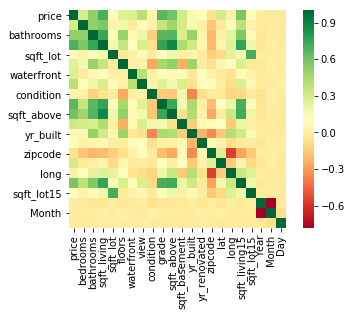

In [7]:
sns.heatmap(kc_housing.corr(), square=True, cmap='RdYlGn')

For the target variable of price, it looks from this figure that the variables bathrooms, sqft_living, grade, and sqft_above are most strongly correlated. I thought bedrooms as well would be a strong predictor, I'm glad the heat map was able to correct my assumption.
Next I will explore each of these features more thouroughly to better pin down the correlation statistics with the target variable.

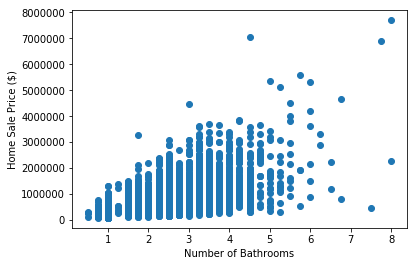

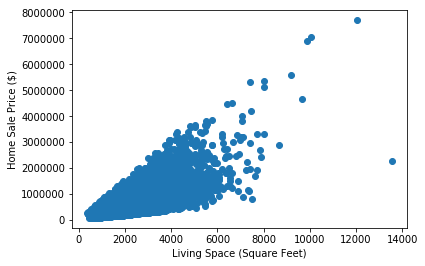

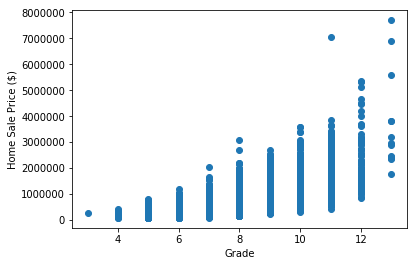

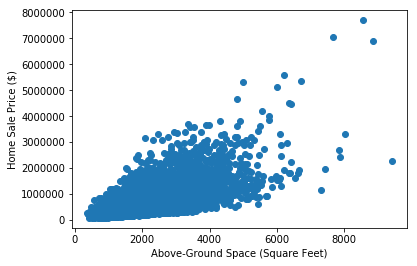

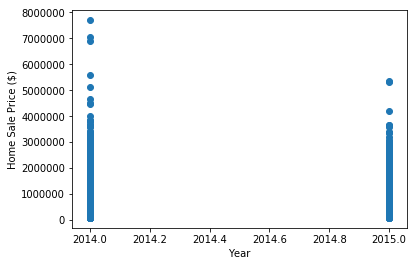

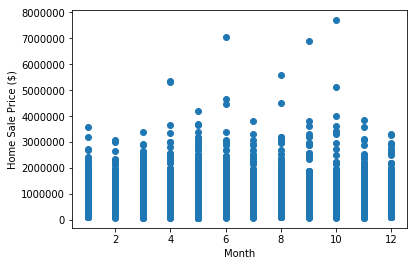

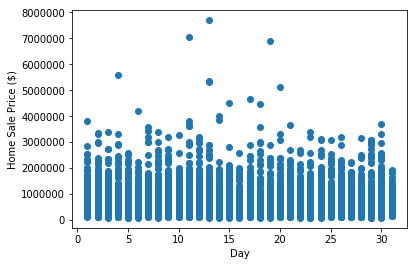

In [8]:
plt.scatter(kc_housing['bathrooms'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Number of Bathrooms')
plt.show()

plt.scatter(kc_housing['sqft_living'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Living Space (Square Feet)')
plt.show()

plt.scatter(kc_housing['grade'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Grade')
plt.show()

plt.scatter(kc_housing['sqft_above'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Above-Ground Space (Square Feet)')
plt.show()

plt.scatter(kc_housing['Year'], kc_housing['price']) #reconfirming the 0 correlation between date columns and target variable.
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Year')
plt.show()

plt.scatter(kc_housing['Month'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Month')
plt.show()

plt.scatter(kc_housing['Day'], kc_housing['price'])
plt.ylabel('Home Sale Price ($)')
plt.xlabel('Day')
plt.show()

I did not expect the Year, Month, and Day columns to correlate strongly with sale price; this hypothesis is shown to be true from these plots alone. Now I will get the exact figures on how each of the most strongly correlated feature variables correlate with the target variable.

In [9]:
print(kc_housing[['price', 'bathrooms']].corr())
print(kc_housing[['price', 'sqft_living']].corr())
print(kc_housing[['price', 'grade']].corr())
print(kc_housing[['price', 'sqft_above']].corr())

              price  bathrooms
price      1.000000   0.525905
bathrooms  0.525905   1.000000
                price  sqft_living
price        1.000000     0.701909
sqft_living  0.701909     1.000000
          price     grade
price  1.000000  0.667922
grade  0.667922  1.000000
               price  sqft_above
price       1.000000    0.605371
sqft_above  0.605371    1.000000


The above figures show that the sqft_living column carries the highest correlation with our target variable. The grade column is not far behind.
Now I can implement supervised learning tools to create a model to predict sales prices. I will be comparing various models and the same models with different methods of implementation.
First I will confirm the most highly correlated feature variables using Lasso regression. Lasso regression is best at eliminating useless variables by shrinking their value to 0. I will also scale the data beforehand.

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[-33101.33940987  31775.7195298  227950.23492106   5159.96665364
   3787.29298996  50515.61592645  40185.39958593  18285.15897881
 114002.11762252 -55639.15180048 -43550.9915582  -77070.97546955
   8387.63546792 -31114.7347981   83733.34882636 -30261.13081003
  14482.58647053 -10581.0757279   16980.63157107   3454.88476714
  -2985.7489867 ]


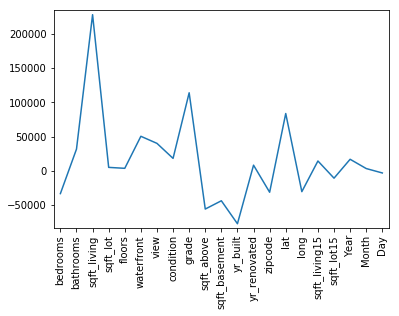

[-32712.07653444  31597.39066558 137483.36046876   4688.611267
   3607.69888723  50443.17106498  40162.93066706  18151.55425391
 114045.98118853  25663.31596923      0.         -76796.76487696
   8321.41960583 -30732.7738409   83593.00430411 -29985.28866258
  14421.55980743 -10089.62055817  16356.63507636   2855.20879592
  -2888.72775113]


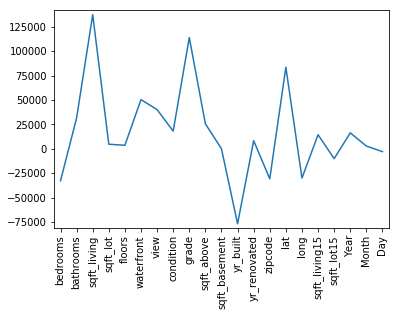

[-2.90545635e+04  2.92572314e+04  1.37305839e+05  1.49582639e+01
  1.92795958e+03  4.96696483e+04  3.99758655e+04  1.68434569e+04
  1.14756479e+05  2.42567675e+04  0.00000000e+00 -7.40850096e+04
  7.63853709e+03 -2.69370441e+04  8.21636685e+04 -2.71487645e+04
  1.31443164e+04 -5.30672280e+03  1.25891959e+04  0.00000000e+00
 -1.71011614e+03]


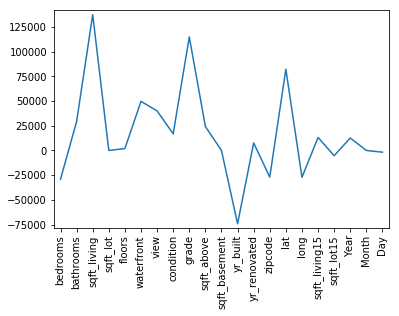

[    -0.           2501.63193278 147001.11292922     -0.
      0.          41870.80386615  37709.06479295   5175.05231576
 116498.20971337      0.              0.         -50725.61238588
    689.57057166     -0.          69286.10621266  -2677.62359518
   4740.12540503     -0.              0.             -0.
     -0.        ]


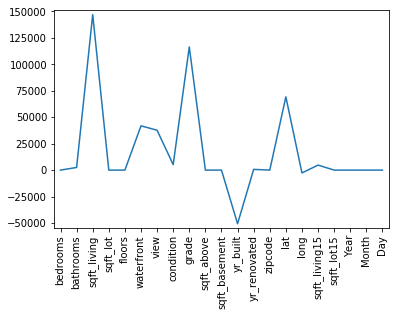

[    0.             0.         85584.54298677     0.
     0.             0.             0.             0.
 32969.79951134     0.             0.            -0.
     0.             0.             0.            -0.
     0.             0.             0.            -0.
    -0.        ]


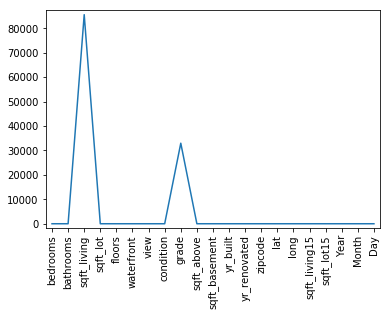

In [14]:
y = kc_housing['price'].values
X = kc_housing.drop(['price', 'date'], axis=1).values #had to drop date as the Lasso regression model will not accept object type
X_scale=scale(X)

#Tried to do a pipeline, found it easier to just scale at the beginning.
"""lasso_steps=[('scaler', StandardScaler()),
            ('lasso', Lasso(alpha=0.4, normalize=True))]

pipeline=Pipeline(lasso_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso_scaled=pipeline.fit(X_train, y_train)

lasso_coef = lasso_scaled.steps[1][1].coef_
print(lasso_coef)"""
for i in [0.1, 1, 10, 100, 1000]:
    lasso = Lasso(alpha=i, normalize=True)

    lasso.fit(X_scale, y)

    lasso_coef = lasso.coef_
    print(lasso_coef)

    plt.plot(range(len(kc_housing.drop(['price', 'date'], axis=1).columns)), lasso_coef)
    plt.xticks(range(len(kc_housing.drop(['price', 'date'], axis=1).columns)), kc_housing.drop(['price', 'date'], axis=1).columns.values, rotation=90)
    plt.margins(0.02)
    plt.show()

As the alpha value increases, the most prominent features become apparent: sqft_living and grade. These also happen to be the two most highly correlated features with the target variable as was calculated in the last section.
At lower alpha values, the feature variables I pointed out earlier (bathrooms, sqft_living, grade, and sqft_above) are all shown to be non-zero, which means the Lasso model has chosen these features as decent predictors for the target variable of price. Other features pointed out include lat, yr_built, and waterfront. I will now view the correlations for these features. After, I will create a Ridge model for predicting the target variable with two different formats: one including all feature variables and one including only feature variables not close to 0 on the Lasso model. Ridge models typically work better when the noisy variables are removed and the highly correlated features are the only ones used for prediction.

In [19]:
print(kc_housing[['price', 'lat']].corr())
print(kc_housing[['price', 'yr_built']].corr())
print(kc_housing[['price', 'waterfront']].corr())

          price       lat
price  1.000000  0.306777
lat    0.306777  1.000000
             price  yr_built
price     1.000000  0.053984
yr_built  0.053984  1.000000
               price  waterfront
price       1.000000    0.266437
waterfront  0.266437    1.000000


Interesting that the Lasso model had yr_built with a high (negative) value but the correlation with the target variable is so low. I will consider creating a third Ridge model using the feature variables chosen by the Lasso model but exluding yr_built.
Now I will create the Ridge models. I will begin with the Ridge model using all features (except Date).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.2, 0.4, 0.6, 0.8]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.2}
Tuned Ridge R squared: 0.705201963362


Now the Ridge model using only the features the Lasso model highlighted.

In [21]:
X_scale_lasso = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'yr_built', 'waterfront']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_lasso, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.2, 0.4, 0.6, 0.8]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.2}
Tuned Ridge R squared: 0.683716386577


Part of me believed that the removal of the lesser-correlated figures would increase the Ridge model's effectiveness by removing any 'white noise'. It seems the incorporation of the lesser-correlated features increases the model's effectiveness. I will test this theory again by creating a Ridge model with just the four highest correlated feature variables taken from the heat map.
Additionally, I will choose alpha values closer to the 0.2 value that is consistently chosen above as the best parameter value.

In [23]:
X_scale_heat = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_heat, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.1, 0.2, 0.3, 0.4]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.1}
Tuned Ridge R squared: 0.55259044243


Even with a different (likely more appropriate) alpha value, this model has lesser effectiveness than the second model with the feature variables filtered by the Lasso model. This is reconfirming the fact that, for this dataset, more features equates to a more highly effective regression model.

I will try one last Ridge model using only the two most highly correlated features: sqft_living and grade.

In [34]:
X_scale_two = scale(kc_housing[['sqft_living', 'grade']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_two, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.1, 0.2, 0.3, 0.4]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.1}
Tuned Ridge R squared: 0.552044496822


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Still the first model using all the features appears to be the most effective.
I will now attempt to increase the effectiveness of each of the Ridge models we have tested with alpha values wittled down to values between 0.06 and 0.16. With all models on the same level with alpha values being used I will see which collection of feature variables creates the most highly effective Ridge regression model.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.06, 0.08, 0.1, 0.12, 0.14, 0.16]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.06}
Tuned Ridge R squared: 0.711701755233


In [28]:
X_scale_lasso = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'yr_built', 'waterfront']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_lasso, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.06, 0.08, 0.1, 0.12, 0.14, 0.16]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.06}
Tuned Ridge R squared: 0.691245828394


In [29]:
X_scale_heat = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_heat, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.06, 0.08, 0.1, 0.12, 0.14, 0.16]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'alpha': 0.06}
Tuned Ridge R squared: 0.556985105391


In [30]:
X_scale_two = scale(kc_housing[['sqft_living', 'grade']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_two, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

ridge = Ridge(normalize=True) #instantiate the Ridge model to put in the GridSearchCV
params={'alpha':[0.06, 0.08, 0.1, 0.12, 0.14, 0.16]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(ridge, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(gs_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Tuned Ridge Alpha: {'alpha': 0.06}
Tuned Ridge R squared: 0.556985105391


As seen above, even with all models using the same alpha value, the model with the most feature variables used had the highest R squared value. The Ridge model using the feature variables selected by the Lasso regression only had a slight drop in R squared values from the Ridge model using all the feature variables. However, a large drop in R squared value is observed when I created the Ridge model that used only the four (or two) most highly correlated feature variables from the heat map. Once again showing, more feature variables equates to more highly effective Ridge regression models.
Next, I will test if the same hypothesis holds true for elastic net regression models (which typically work better with more features included), while also comparing the effectiveness of elastic net models to Ridge models.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [1, 5, 10],
        "alpha": [0.1, 1, 10, 100, 1000],
        "l1_ratio": np.linspace(0, 1, 10)} #set up dictionary with parameter name as key and list of values to test as value.
#The np.linspace() function sets up evenly spaced numbers over the range given. So I will have 10 evenly spaced numbers between 0 and 1.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet l1 ratio: {'alpha': 1, 'max_iter': 10, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.712172116844


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


It seems this elastic net model is slightly more effective than the most effective Ridge model above: an R squared of 0.7122 compared to 0.7117. I will now see if removing features affects the performance of the elastic net model. Afterwards, I will alter the parameters (max_iter, alpha, and l1_ratio) of the model to see if I can improve performance there.

In [33]:
X_scale_lasso = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'yr_built', 'waterfront']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_lasso, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [1, 5, 10],
        "alpha": [0.1, 1, 10, 100, 1000],
        "l1_ratio": np.linspace(0, 1, 10)} #set up dictionary with parameter name as key and list of values to test as value.
#The np.linspace() function sets up evenly spaced numbers over the range given. So I will have 10 evenly spaced numbers between 0 and 1.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet l1 ratio: {'alpha': 10, 'max_iter': 10, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.689735879659


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

The same thing happened to the elastic net model that happened to the Ridge model, but to a greater degree. As features are removed, the elastic net model performs less effectively. The elastic model with these 7 features used performs worse than the Ridge model using the same features. I expect the next two models to also decrease in effectiveness.

In [35]:
X_scale_heat = scale(kc_housing[['bathrooms', 'sqft_living', 'grade', 'sqft_above']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_heat, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [1, 5, 10],
        "alpha": [0.1, 1, 10, 100, 1000],
        "l1_ratio": np.linspace(0, 1, 10)} #set up dictionary with parameter name as key and list of values to test as value.
#The np.linspace() function sets up evenly spaced numbers over the range given. So I will have 10 evenly spaced numbers between 0 and 1.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet l1 ratio: {'alpha': 10, 'max_iter': 10, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.559799025664


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

In [36]:
X_scale_two = scale(kc_housing[['sqft_living', 'grade']].values)
X_train, X_test, y_train, y_test = train_test_split(X_scale_two, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [1, 5, 10],
        "alpha": [0.1, 1, 10, 100, 1000],
        "l1_ratio": np.linspace(0, 1, 10)} #set up dictionary with parameter name as key and list of values to test as value.
#The np.linspace() function sets up evenly spaced numbers over the range given. So I will have 10 evenly spaced numbers between 0 and 1.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very 

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet l1 ratio: {'alpha': 10, 'max_iter': 10, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.553918739642


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

As expected, the models' R squared values decreased as more features were removed. Now I will check the hyperparameters of the model to see if I can get a higher R squared value. I will be using the most effective model, the first I created with all features (except date) included.
If I look at the hyperparameters used by each elastic net model, they all use the maximum values for max_iter and l1_ratio so I will shift those hyperparameters to be much closer to currently chosen max_iter and l1_ratio values.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [5, 10, 15, 20],
        "alpha": [0.1, 1, 10, 100, 1000],
        "l1_ratio": np.linspace(1, 10, 10)} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet l1 ratio: {'alpha': 0.1, 'max_iter': 20, 'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.712028803233


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


After trying this out, a new idea has occurred to me. I will keep two of the current three parameters chosen for the first (and most effective) elastic net model constant, then see if changes in one parameter results in a higher R squared value.
First, I will try shifting the max_iter value only. I will be choosing values close to the chosen value above; 10

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 14) #split data so I have holdout
#set to test upon after performing GridSearchCV with training set.

elastic_net = ElasticNet(normalize=True) #instantiate the ElasticNet model to put in the GridSearchCV
params={"max_iter": [10, 11],
        "alpha": [1],
        "l1_ratio": [1]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train)

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet parameters: {'alpha': 1, 'max_iter': 11, 'l1_ratio': 1}
Tuned ElasticNet R squared: 0.712173985207


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


No significant change in R squared value was observed, however a max_iter value of 11 provides a higher R squared value than 10. I also realized the max_iter variable is always chosen as the highest amount in the list provided to the params dictionary.
Changes in the alpha value are next. This is where I expect to see the most amount of change. I will be choosing values close to the chosen value of 1 in the first elastic net model.

In [51]:
params={"max_iter": [11],
        "alpha": [0.4, 1, 1.6, 2.2, 2.8],
        "l1_ratio": [1]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train) #using same X_train and y_train as in last section.

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet parameters: {'alpha': 2.2, 'max_iter': 11, 'l1_ratio': 1}
Tuned ElasticNet R squared: 0.712174086966


Already I can see the diminishing returns of tuning the hyperparameters. I have improved the R squared value once again, but only in the seventh decimal point. I will see if I can get more significant returns on tuning the l1_ratio further.

In [53]:
params={"max_iter": [11],
        "alpha": [2.2],
        "l1_ratio": [0.9, 0.95, 1, 1.05, 1.1]} #set up dictionary with parameter name as key and list of values to test as value.

gs_cv = GridSearchCV(elastic_net, param_grid = params, cv = 5)

gs_cv.fit(X_train, y_train) #using same X_train and y_train as in last section.

r2 = gs_cv.score(X_test, y_test)

print("Tuned ElasticNet parameters: {}".format(gs_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

Tuned ElasticNet parameters: {'alpha': 2.2, 'max_iter': 11, 'l1_ratio': 1}
Tuned ElasticNet R squared: 0.712174086966


C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


No improvement to be had.
To conclude this study, I have found that the elastic net model was more effective than the Ridge model for predicting housing prices, though the degree of difference in R squared values was in the sixth decimal place. With the features in this dataset, more features led to more highly effective models in both Ridge and elastic net models.
It is also worth consideration to point out that the sqft_living feature had a correlation of 0.701909 with the target variable, meaning the best of the models generated were approximately 1% more effective at predicting house price than one feature. But hey, sometimes 1% can be very valuable.